In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000767405"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000767405
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,"SB FINANCIAL GROUP, INC."
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,49.0,1.237755e+01,1.777624e+00,9.46,11.16,12.11,13.3,16.36
interest income,49.0,7.571246e+06,1.158259e+06,5741000.00,6666000.00,7499000.00,8206108.0,10638000.00
net income,49.0,1.129664e+06,1.717711e+06,-8078000.00,777000.00,1245000.00,1993000.0,4032000.00
net interest income,49.0,5.536263e+06,1.338930e+06,3584389.00,4875000.00,5279000.00,6112000.0,8614000.00
provision for loan losses,49.0,4.305833e+05,7.409099e+05,-159483.00,92640.00,200000.00,401000.0,3546000.00
total revenue,19.0,9.167316e+06,1.015746e+06,7482000.00,8603000.00,8959000.00,9710000.0,11772000.00


# Plots

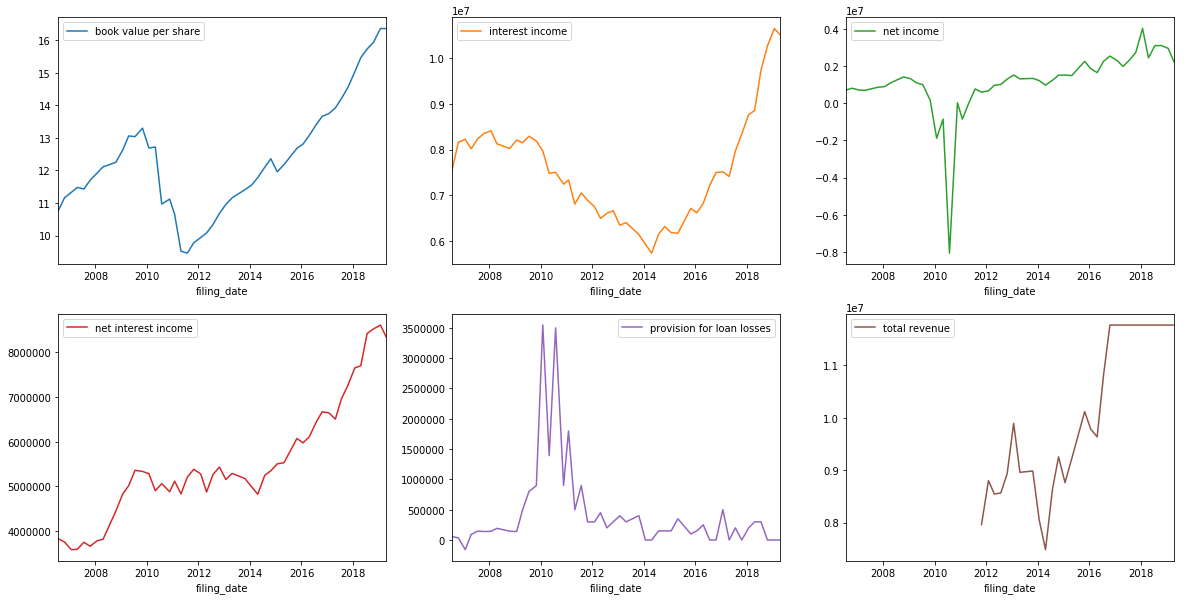

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000767405 book value per share                             2008Q2  missing   
           book value per share                             2013Q2  missing   
           book value per share                             2015Q2  missing   
           book value per share                             2019Q1  missing   
           interest income                                  2008Q2  missing   
           interest income                                  2013Q2  missing   
           interest income                                  2015Q2  missing   
           net income                                       2008Q2  missing   
           net income                                       2013Q2  missing   
           net income                                       2015Q2  missing   
           net interest income                              2008Q2  missing   
           net interest income                              2013Q2  missing   
           net interest income                              2015Q2  missing   
           provision for loan losses                        2008Q2  missing   
           provision for loan losses                        2013Q2  missing   
           provision for loan losses                        2015Q2  missing   
           total revenue              2006Q2 to 2011Q2: 21 periods  missing   
           total revenue                                    2013Q2  missing   
           total revenue                                    2015Q2  missing   
           total revenue              2016Q4 to 2019Q1: 10 periods  missing   

                                             message  
cik        item                                       
0000767405 book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()